# **Assignment 2**
**Group no - 74**

**Group Members -**

- Akshay Kumar (cs23mtech11022)

- Sanket Rathod (cs23mtech11033)

# **Q1 A)**
Perform PCA on SVHN data set. Find how many top eigenvectors are required to keep
the proportion of variance above 0.9. Plot PoV against number of eigenvectors.

In [72]:
#Importing Required Packages
import numpy as np
from scipy.io import loadmat
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [73]:
# Loading SVHN test dataset
data = loadmat('train_32x32.mat')
images = data['X']
labels = data['y']
#printing images and labels to visualize the data
print(images)
print(labels)

[[[[ 33  84  19 ...  92 190 216]
   [ 30  76  54 ...  78 188 217]
   [ 38  59 110 ... 101 191 212]]

  [[ 15  86  20 ...  94 205 221]
   [ 23  73  52 ...  82 203 222]
   [ 19  66 111 ... 105 206 217]]

  [[ 15  77  25 ... 114 220 226]
   [ 17  78  57 ... 101 218 227]
   [ 19  56 116 ... 125 220 221]]

  ...

  [[ 72  90  65 ... 200 229 200]
   [ 65  78 144 ... 201 231 199]
   [ 56  69 223 ... 203 224 191]]

  [[ 82  88  78 ... 192 229 193]
   [ 77  77 148 ... 193 229 188]
   [ 57  67 218 ... 195 224 182]]

  [[ 89  88  98 ... 190 229 197]
   [ 79  78 158 ... 191 228 189]
   [ 59  66 220 ... 193 223 186]]]


 [[[ 28  85  21 ...  92 183 204]
   [ 39  77  53 ...  78 182 205]
   [ 35  61 110 ... 103 186 202]]

  [[ 14  83  19 ...  93 200 210]
   [ 25  73  52 ...  80 199 211]
   [ 22  64 106 ... 106 201 208]]

  [[ 14  74  25 ... 111 218 220]
   [ 20  69  56 ...  98 217 221]
   [ 17  59 111 ... 124 218 217]]

  ...

  [[ 40  89  63 ... 181 227 201]
   [ 39  82 137 ... 180 228 199]
   [ 50  

In [74]:
#To see whats inside the dataset
keys = data.keys()
#printing Keys
print(keys)

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


In [75]:
#Analysing the dimensions of the data
print(images.shape)
print(labels.shape)

(32, 32, 3, 73257)
(73257, 1)


In [76]:
#initially we have created images and label variables
# in which Images is a 4D matrix andd label is a vector

#As mension in question we need to perform operations on 25000 images with 2500 images from each class
sample_size = 2500
# Create an empty list to store the selected samples and labels
images_subset = []
labels_subset = []
subset_indices = []

# Iterate through each class
for i in range(1, 11):
    # Find the indices of samples with the current class label
    class_indices = np.where(labels == i)[0]

    # Randomly shuffle the indices to select different samples
    np.random.shuffle(class_indices)

    # Extracting 2500 samples of class i
    class_indices = class_indices[:sample_size]
    # Storing all indices to subset_indices variable
    subset_indices.extend(class_indices)

# Extracted image corresponding to each indices
images_subset = images[:, :, :, subset_indices]
# Extracting Labels corresponding to each indices
labels_subset = labels[subset_indices]

# Printing the size of images and labels
print(images_subset.shape)
print(labels_subset.shape)

(32, 32, 3, 25000)
(25000, 1)


In [77]:
# Transposing the image_subset matrix
transposed_images = np.transpose(images_subset, (3, 0, 1, 2))
# Flattened the images into 2 D matrix form
images_flat = transposed_images.reshape(-1, 32 * 32 * 3)
print(images_flat)
print("\n Size of flattened Matrix : ", images_flat.shape)

[[ 46  44  47 ...  63  64  69]
 [ 93  63  73 ... 190 202 216]
 [ 92  95 100 ... 122 113 106]
 ...
 [121 136 140 ... 111 117 131]
 [165 173 196 ...  64  43  52]
 [ 82  82  84 ...  95 101  91]]

 Size of flattened Matrix :  (25000, 3072)


In [78]:
# Scalling the images to enhancing the model performance
scale_function = StandardScaler()
scale_function.fit(images_flat)
images_scaled = scale_function.transform(images_flat)
# Printing Scaled Images
print(images_scaled)

[[-1.35272888 -1.35268044 -1.36712387 ... -0.99948221 -0.95904275
  -0.95571816]
 [-0.44403604 -0.99364468 -0.8711602  ...  1.46875899  1.67827741
   1.92305953]
 [-0.46336993 -0.38895288 -0.35612099 ...  0.14718103 -0.02260298
  -0.23112786]
 ...
 [ 0.09731288  0.38580849  0.40690004 ... -0.06660364  0.05384108
   0.25846019]
 [ 0.94800405  1.08498338  1.4751295  ... -0.98004724 -1.36037408
  -1.28863803]
 [-0.65670883 -0.63460893 -0.66132941 ... -0.37756316 -0.25193517
  -0.52488068]]


In [79]:
# Applying PCA on scaled images
pca = PCA()
pca_data = pca.fit_transform(images_scaled)
# Printing Pca data
print(pca_data)

[[-7.89241780e+01 -4.92198343e+00 -1.15310425e+01 ...  3.58101280e-03
  -7.57333207e-04  5.41354303e-03]
 [ 7.11878479e+01 -7.93953842e+00  3.09398017e+01 ...  1.38040654e-03
   2.26854598e-03 -3.99023244e-03]
 [ 2.43136487e+01 -3.73472893e+00 -1.01083467e+01 ... -2.94950676e-03
   6.56402561e-03 -1.15039228e-02]
 ...
 [-1.03609276e+00 -5.80649334e+00 -8.35689230e+00 ... -8.02168621e-03
  -4.38839458e-03 -9.01022095e-03]
 [ 1.68516028e+01  2.65194281e+01 -2.00779962e+01 ... -6.12731525e-03
   6.87231891e-04 -6.49828200e-03]
 [-1.09431808e+01  1.80326546e+00  2.42223966e+00 ... -3.88512767e-03
   2.61915192e-03 -3.36168169e-03]]


In [80]:
# Printing Variences we got after PCA Dimensionality reduction
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[1.77170496e+03 1.80903117e+02 1.57352600e+02 ... 2.59011154e-05
 2.57040387e-05 2.56326035e-05]
[5.76703805e-01 5.88853779e-02 5.12195006e-02 ... 8.43101540e-09
 8.36686542e-09 8.34361269e-09]


In [81]:
# Here we have to find Eigen vectors required to keep Proportion of Varience Above 0.9

# Setting up POV to 0.9
required_pov = 0.9
sum_pov = 0.0
num_eigenvectors = 0

# Initialize a list to store the cumulative PoV.
cumulative_variance = []

# Iterate through the explained variance ratios
for v_ratio in pca.explained_variance_ratio_:
    sum_pov += v_ratio
    num_eigenvectors += 1
    cumulative_variance.append(sum_pov)

    if sum_pov >= required_pov:
        break
# Printing Cumulative Varience
print("Cumulative Variences : ", cumulative_variance)

Cumulative Variences :  [0.5767038049220321, 0.6355891827863199, 0.68680868341974, 0.7259934071814533, 0.7480515989714441, 0.7662218325555572, 0.781843479576733, 0.7969815849842444, 0.8094905359939363, 0.8206298058447136, 0.8297553972909464, 0.8384983836629317, 0.8458530982465507, 0.8516522842435797, 0.8570131751543475, 0.8621145633899915, 0.8670152459564966, 0.871406458845361, 0.8757139246190017, 0.8797941871445651, 0.8834628261486022, 0.8870357659534528, 0.8905029373672412, 0.8936478718935854, 0.8967568075990081, 0.8997474052840422, 0.9025366023169543]


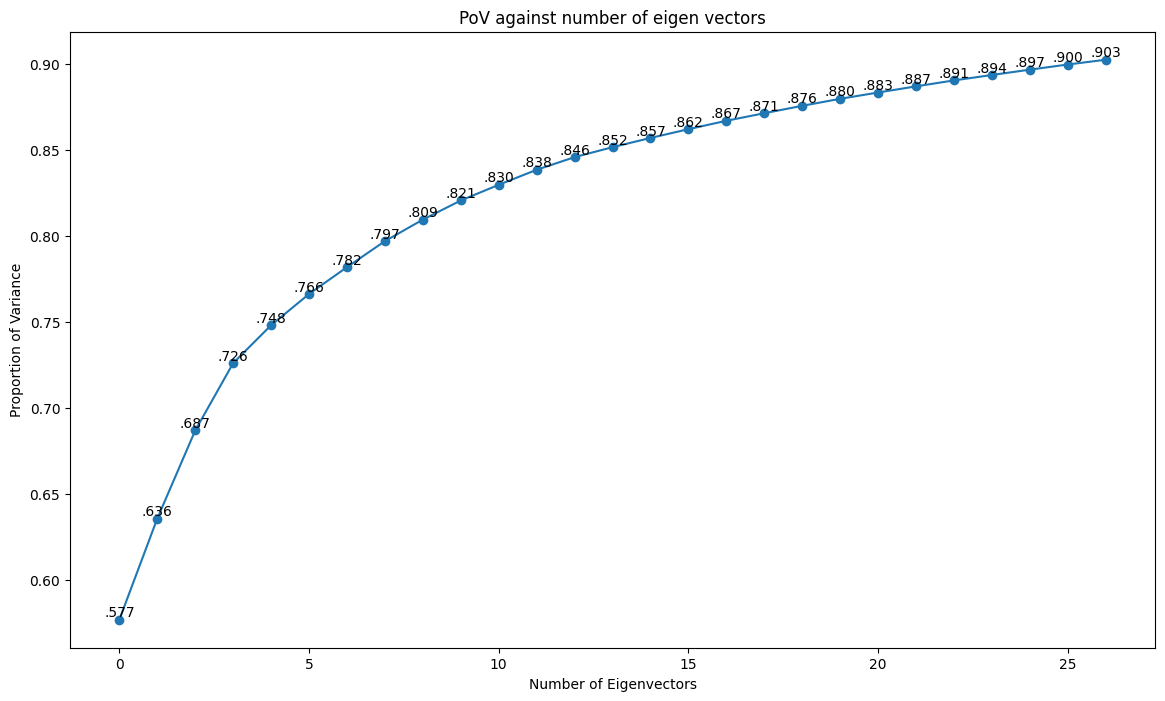

In [82]:
# To plot POV against number of eigen vector Graph

plt.figure(figsize=(14,8))
# Create a basic line graph
plt.plot(cumulative_variance, marker='o', linestyle='-')

# Adding labels above each data point
for i, value in enumerate(cumulative_variance):
    plt.text(i, value, f"{value:.3f}".lstrip('0') , ha='center', va='bottom')


plt.title("PoV against number of eigen vectors")
plt.xlabel('Number of Eigenvectors')
plt.ylabel('Proportion of Variance')

# Show the graph
plt.show()

#**Q1 B)**
Visualize top 10 eigenvectors and provide reconstruction of 10 SVHN samples (one
from each class) using top 10 eigenvectors.

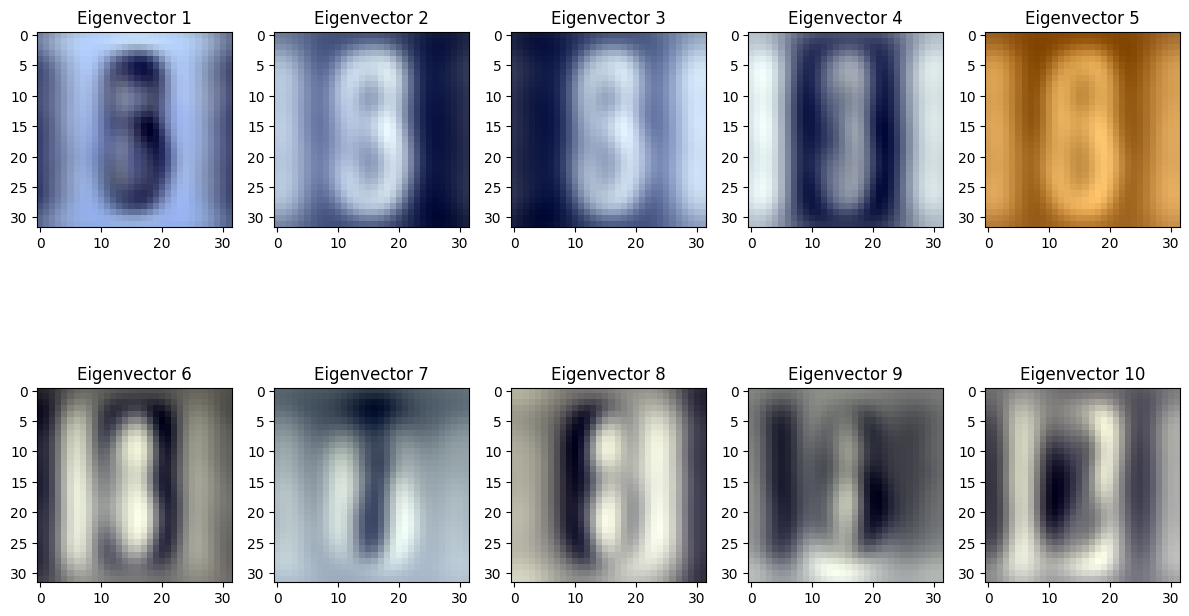

In [83]:
# Extracting the top 10 eigenvectors
top_10_eigenvectors = pca.components_[:10]

# Visualizing the top 10 eigenvectors.
plt.figure(figsize=(12, 8))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    eigenvector = top_10_eigenvectors[i].reshape(32, 32, 3)
    # Normalize the eigenvector to the [0, 1] range
    eigenvector -= np.min(eigenvector)
    eigenvector /= np.max(eigenvector)
    plt.imshow(eigenvector)
    plt.title(f'Eigenvector {i + 1}')

plt.tight_layout()
plt.show()

PCA is a linear technique and may not be the most suitable for capturing complex, non-linear relationships in data. In the context of image recognition, more advanced techniques like convolutional neural networks (CNNs) are often used.

So, PCA might not provide visually distinct eigenvectors in this case

Here, the images of all the top 10 eigen vectors looks like digit 8. It is because most of the digits from 0 to 9 looks like to be formed from modification of digit 8, that is being captured by the eigen vectors.



In [84]:
# performing PCA dimensionality reduction with 10 components
pca_10 = PCA( n_components = 10)
pca_data_10 = pca_10.fit_transform(images_scaled)

In [85]:
# Printing PCA data for 10 Eigen vecctors
print(pca_data_10)
print(pca_data_10.shape)

[[-78.924178    -4.92198343 -11.53104245 ...   5.78254625  -0.18244208
    2.61346174]
 [ 71.18784789  -7.93953841  30.9398017  ...  -1.47490914   3.31417766
    6.52250463]
 [ 24.31364866  -3.73472893 -10.10834673 ...  -5.27008515  -4.80167694
   -0.88794973]
 ...
 [ -1.03609276  -5.80649334  -8.35689232 ...   1.85143078   3.8932195
    3.14332365]
 [ 16.85160282  26.51942812 -20.07799616 ...   4.20646605   4.13215302
   -4.40666161]
 [-10.94318078   1.80326548   2.4222397  ...  -2.23064402  -8.0141048
    0.53794713]]
(25000, 10)


In [86]:
# Now we have to select 10 eigen vectors one from each class

images_sample_10 = []
labels_sample_10 = []
index_values_10 = []

for i in range(1, 11):
    class_indices = np.where(labels_subset == i)[0]
    class_index = class_indices[0]
    index_values_10.append(class_index)

# Storing Image sample for 10 eigen vectors
images_sample_10 = pca_data_10[index_values_10]
labels_sample_10 = labels_subset[index_values_10]

print(images_sample_10)
print(labels_sample_10)

[[-78.924178    -4.92198343 -11.53104245  -2.32579827  -2.87708226
   -0.88452939   8.49896389   5.78254625  -0.18244208   2.61346174]
 [-41.41474944  -8.9981308    1.62220902  -4.29824536   0.96486529
    1.86577078   5.49270957   1.04923045  -5.67804031   4.13346374]
 [-51.72414011   6.53788522   5.06701477  12.74525438   2.5362725
   -7.31884459   4.76555966   1.05378221   6.27416329  -0.25816707]
 [ 21.76375496 -11.39716747 -24.54683786   7.12114779 -14.84249837
   -4.40081797   0.20138651  -3.31981469   2.61683126  -8.81695629]
 [ 26.26967772  -7.44634642  26.60183075 -23.92755379   1.13741874
   -3.95008847   2.19308274  -4.52419965   9.5450512   -0.57617701]
 [ -2.5991354  -11.43598725   0.64273926  -6.20104782  -4.10275975
   -2.65548516   1.48097905  -0.89104508   2.30963674   0.14007249]
 [-30.7545386  -11.93742981 -15.1372157   11.68732542  -8.43818038
   -5.34586131  10.21117869  -5.44824564  -1.23627991  -2.29914966]
 [-49.58584354   7.31009601  12.27399681   3.68251511  -

In [87]:
# Reconstruction of Images
images_reconstructed_10 = pca_10.inverse_transform(images_sample_10)
print(images_reconstructed_10.shape)

(10, 3072)


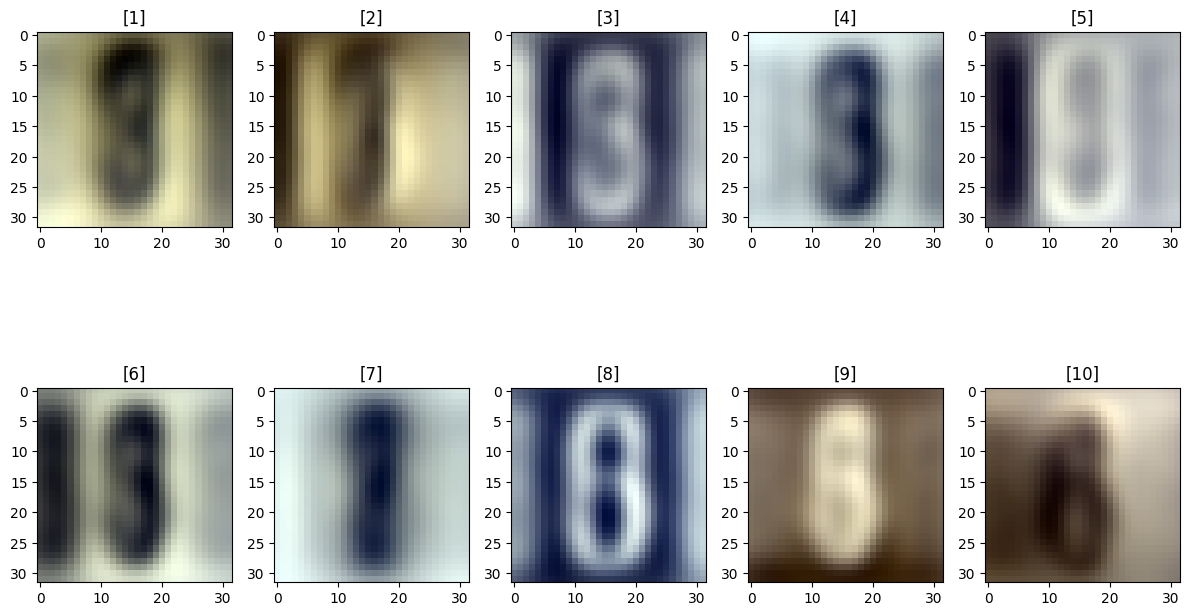

In [88]:
# Visualize the top 10 eigenvectors
plt.figure(figsize=(12, 8))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    img = images_reconstructed_10[i].reshape(32, 32, 3)
    # Normalize the eigenvector to the [0, 1] range
    img -= np.min(img)
    img /= np.max(img)
    plt.imshow(img)
    plt.title(f'{labels_sample_10[i]}')

plt.tight_layout()
plt.show()

Here we get the output images for the top 10 Eigen vectors

In [89]:
# Performing pca for 27 Eigen vectors.
pca_27 = PCA( n_components = 27)
pca_data_27 = pca_27.fit_transform(images_scaled)

In [90]:
# Printing 27 Eigen vectors
print(pca_data_27)
print(pca_data_27.shape)

[[-78.924178    -4.92198343 -11.53104245 ...   0.5961859   -1.29987456
    0.67412633]
 [ 71.18784789  -7.93953842  30.93980168 ...   5.86657989  -0.26924009
   -3.39503382]
 [ 24.31364866  -3.73472893 -10.1083467  ...   0.955118     0.55474022
    1.53041451]
 ...
 [ -1.03609276  -5.80649334  -8.3568923  ...   0.28116751   0.3518824
    5.1017987 ]
 [ 16.85160282  26.5194281  -20.07799616 ...  -4.23302699   5.00795914
    8.4052195 ]
 [-10.94318078   1.80326546   2.42223966 ...   0.91128333  -4.1475199
   -0.15078858]]
(25000, 27)


In [91]:
# Select one sample from each class
images_sample_27 = []
labels_sample_27 = []
index_values_27 = []

for i in range(1, 11):
    class_indices = np.where(labels_subset == i)[0]
    class_index = class_indices[0]
    index_values_27.append(class_index)


images_sample_27 = pca_data_27[index_values_27]
labels_sample_27 = labels_subset[index_values_27]

print(images_sample_27)
print(labels_sample_27)

[[-7.89241780e+01 -4.92198343e+00 -1.15310425e+01 -2.32579832e+00
  -2.87707364e+00 -8.84532568e-01  8.49894357e+00  5.78251466e+00
  -1.82668468e-01  2.61417551e+00  1.49727175e+00 -1.43778224e+00
   1.79506543e+00  1.62793084e+00  1.01225231e+00  9.49252822e-01
   1.95651143e+00 -1.70129125e+00 -6.49735532e-02 -2.54150052e+00
   1.19965640e+00  5.85189880e-01 -1.30073196e+00 -3.84075779e-02
   5.96185903e-01 -1.29987456e+00  6.74126330e-01]
 [-4.14147494e+01 -8.99813079e+00  1.62220902e+00 -4.29824524e+00
   9.64846020e-01  1.86576911e+00  5.49271714e+00  1.04932934e+00
  -5.67757762e+00  4.13240546e+00  5.00961365e+00 -1.37607768e+00
   1.70623869e+00 -6.53250472e-01  4.70806818e+00  2.54621584e+00
   2.19491207e+00  1.50379753e+00 -1.39541815e+00  1.59141353e+00
  -2.48428936e+00  1.28503534e+00  2.13187112e+00  3.36954924e-01
   1.17307689e+00 -8.91591686e-01  1.80297055e+00]
 [-5.17241401e+01  6.53788524e+00  5.06701477e+00  1.27452557e+01
   2.53605747e+00 -7.31910312e+00  4.765

In [92]:
# Reconstructed images samples
images_reconstructed_27 = pca_27.inverse_transform(images_sample_27)

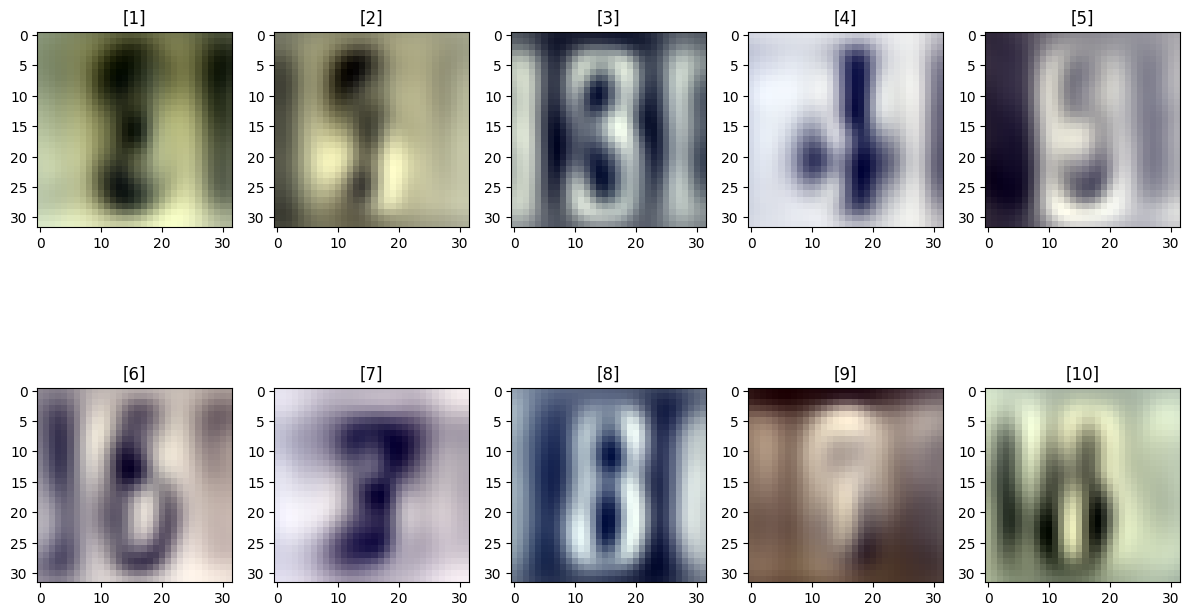

In [93]:
# Visualizing the 27 eigenvectors
plt.figure(figsize=(12, 8))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    img = images_reconstructed_27[i].reshape(32, 32, 3)
    # Normalize the eigenvector to the [0, 1] range
    img -= np.min(img)
    img /= np.max(img)
    plt.imshow(img)
    plt.title(f'{labels_sample_27[i]}')

plt.tight_layout()
plt.show()

Here we are getting better results Compared to the 10 Eigen vectors.
So for 0.9 POV we need 27 Eigen vectors to get better accuracy.

# **Q1 C)**
Run k-NN (for k=5 and k=7) on raw data and data obtained after PCA dimensionality
reduction for dimension as found in part (a) and for dimension 10 as in part (b). Provide
the accuracy of the predictions on the test data set for these various cases and discuss
your observations.


In [94]:
# Define k-NN classifiers with Values 5 and 7
knn_5_raw = KNeighborsClassifier(n_neighbors=5)
knn_7_raw = KNeighborsClassifier(n_neighbors=7)

In [95]:
# Transposing Image matrix
transposed_Image = np.transpose(images, (3, 0, 1, 2))
# Flattening images using reshape
raw_images_flat = transposed_Image.reshape(-1, 32 * 32 * 3)
print(raw_images_flat.shape)

(73257, 3072)


In [96]:
# Scalling Flattened Images
raw_scale_function = StandardScaler()
raw_scale_function.fit(raw_images_flat)
raw_images_scaled = raw_scale_function.transform(raw_images_flat)
# Printing Scalled Images
print(raw_images_scaled)
print(raw_images_scaled.shape)

[[-1.59095072 -1.60255922 -1.52101425 ... -0.21698609 -0.15282527
  -0.76607046]
 [-0.60440738 -0.73126876 -1.11890062 ... -0.21698609 -0.3063079
  -0.74636019]
 [-1.86176654 -1.14797289 -0.14233894 ... -0.99694751  0.5954025
   2.2298904 ]
 ...
 [-0.44965548 -0.69338657 -0.31467335 ...  2.02540298  1.97674609
   1.97365691]
 [ 1.44605526  1.39013411  1.40867079 ...  2.02540298  1.90000478
   1.79626449]
 [ 1.94899893  1.93942593  1.81078442 ...  1.30393867  1.22851831
   1.04727427]]
(73257, 3072)


In [97]:
# Train k-NN on the raw data
knn_5_raw.fit(images_scaled, labels_subset)
knn_7_raw.fit(images_scaled, labels_subset)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [98]:
# Loading test SVHN dataset for Testing.
data = loadmat('test_32x32.mat')
test_images = data['X']
test_labels = data['y']
print(test_images.shape)
print(test_labels.shape)

(32, 32, 3, 26032)
(26032, 1)


In [99]:
# Transposing Images
transposed_images = np.transpose(test_images, (3, 0, 1, 2))
# Flattening Images
test_images_flat = transposed_images.reshape(-1, 32 * 32 * 3)
print(test_images_flat.shape)

(26032, 3072)


In [100]:
# Performed Scalling on the data
test_scale_function = StandardScaler()
test_scale_function.fit(test_images_flat)
test_images_scaled = test_scale_function.transform(test_images_flat)
print(test_images_scaled)
print(test_images_scaled.shape)

[[-1.31235707 -0.16399548 -0.88074389 ... -1.24832307 -0.00576981
  -0.71537917]
 [ 0.23465345  0.4727349   0.62326984 ...  0.13137329  0.27084112
   0.65621287]
 [ 0.59165588  0.76661047  0.88202489 ...  0.62533866  0.88914792
   1.09189505]
 ...
 [-0.00334817  0.3094707   0.44537574 ...  0.48907235  0.71016437
   0.80144026]
 [-0.32635037 -0.78439944 -1.09098237 ... -0.19225919 -0.46136429
  -0.7637883 ]
 [-0.24134979 -0.62113524 -0.88074389 ... -0.22632576 -0.68916153
  -1.05424309]]
(26032, 3072)


In [101]:
# Testing k-NN on the raw data
y_pred_5_raw = knn_5_raw.predict(test_images_scaled)
y_pred_7_raw = knn_7_raw.predict(test_images_scaled)

In [102]:
# Printing Testing labels and predicted Labels
print(y_pred_5_raw)
print(test_labels)

[ 3  2  2 ... 10  2  2]
[[5]
 [2]
 [1]
 ...
 [7]
 [6]
 [7]]


In [103]:
# Calculate accuracy for K=5 and K=7
accuracy_5_raw = accuracy_score(test_labels, y_pred_5_raw)
accuracy_7_raw = accuracy_score(test_labels, y_pred_7_raw)

# Print the accuracies and discuss your observations
print("Accuracy (k=5) on raw data:", accuracy_5_raw)
print("Accuracy (k=7) on raw data:", accuracy_7_raw)


Accuracy (k=5) on raw data: 0.4156038721573448
Accuracy (k=7) on raw data: 0.42770436385986477


In [114]:
# Define k-NN classifiers with different values of k
knn_5_27 = KNeighborsClassifier(n_neighbors=5)
knn_7_27 = KNeighborsClassifier(n_neighbors=7)

In [115]:
# Train k-NN on the data found in part a)
knn_5_27.fit(pca_data_27, labels_subset)
knn_7_27.fit(pca_data_27, labels_subset)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [116]:
pca_data_27_test = pca_27.transform(test_images_scaled)

In [117]:
# Test k-NN on the data found in part a)
y_pred_5_27 = knn_5_27.predict(pca_data_27_test )
y_pred_7_27 = knn_7_27.predict(pca_data_27_test )

In [118]:
# Calculate accuracy for the data found in part a)
accuracy_5_27 = accuracy_score(test_labels, y_pred_5_27)
accuracy_7_27 = accuracy_score(test_labels, y_pred_7_27)

# Print the accuracies and discuss your observations
print("Accuracy (k=5) on data with 27 dimensions:", accuracy_5_27)
print("Accuracy (k=7) on data with 27 dimensions:", accuracy_7_27)

Accuracy (k=5) on data with 27 dimensions: 0.4161416717885679
Accuracy (k=7) on data with 27 dimensions: 0.4257452366318377


Here We are getting Simillar Accuracy as in Raw data even after reducing dimensions. it is because of in PCA Dimensionality technique there are some features that we dont need so we can discart them and keep only features which will affect most for the prediction.

In [119]:
# Define k-NN classifiers with different values of k
knn_5_10 = KNeighborsClassifier(n_neighbors=5)
knn_7_10 = KNeighborsClassifier(n_neighbors=7)

In [120]:
# Train k-NN on the the data found in part b)
knn_5_10.fit(pca_data_10, labels_subset)
knn_7_10.fit(pca_data_10, labels_subset)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [121]:
pca_data_10_test = pca_10.transform(test_images_scaled)

In [122]:
# Test k-NN on the data found in part b)
y_pred_5_10 = knn_5_10.predict(pca_data_10_test)
y_pred_7_10 = knn_7_10.predict(pca_data_10_test)

In [123]:
# Calculate accuracy for all data found in part b)
accuracy_5_10 = accuracy_score(test_labels, y_pred_5_10)
accuracy_7_10 = accuracy_score(test_labels, y_pred_7_10)

# Print the accuracies and discuss your observations
print("Accuracy (k=5) on data with 10 dimensions:", accuracy_5_10)
print("Accuracy (k=7) on data with 10 dimensions:", accuracy_7_10)

Accuracy (k=5) on data with 10 dimensions: 0.2619852489244007
Accuracy (k=7) on data with 10 dimensions: 0.27028272894898586


Now here we are getting less accuracy than RAW data and PCA data after reducing dimensions because in this case some required features are also discarted wich will reasults in less accuracy.